# Section II Parking Tickets Data Preprocessing
1. Integrated monthly CSV data into a sigle yearly CSV Data
2. Clean data




In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading multiple files in a directory
import glob

#Import dependacies to allow parsing
from datetime import datetime
import dateutil

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


*italicised text*# Data Set Access and Integration
1 Reading file in one folder
2.Integrated all 2019 csv file into one file
3. Check data format
4.Total Number of Tickets Infractions

In [ ]:
#Import Data in Folder with Path **
path = "/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets" 
all_files = glob.glob(path + "/*.csv")
li=[]

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Create a dataframe using the imported data
parking_data = pd.concat(li, axis=0, ignore_index=True)

parking_data.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***29025,20190101,3,PARK ON PRIVATE PROPERTY,30,0.0,AT,2110 KEELE ST,NaN,NaN,ON
1,***32896,20190101,3,PARK ON PRIVATE PROPERTY,30,1.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON
2,***41781,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,S/O,HAZELWOOD AVE,W/O,JONES AVE,ON
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON
4,***69805,20190101,14,PARK-OBSTRUCT (DRWAY/LANEWAY),50,3.0,R/O,1801 EGLINTON AVE W,NaN,NaN,ON


In [ ]:
len(parking_data) # total parking tickets infractions

2213939

In [ ]:
#Drop empty columns
parking_data=parking_data.drop(columns=["tag_number_masked","location1",
                          "location2","location3",
                          "location4","province","time_of_infraction"])
parking_data.head()

,date_of_infraction,infraction_code,infraction_description,set_fine_amount
0,20190101,3,PARK ON PRIVATE PROPERTY,30
1,20190101,3,PARK ON PRIVATE PROPERTY,30
2,20190101,29,PARK PROHIBITED TIME NO PERMIT,30
3,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50
4,20190101,14,PARK-OBSTRUCT (DRWAY/LANEWAY),50


In [ ]:
from datetime import datetime

parking_data['date'] = pd.to_datetime(parking_data['date_of_infraction'],format='%Y%m%d')
parking_data.index = parking_data['date_of_infraction']
del parking_data['date_of_infraction']



In [ ]:
parking_data

,infraction_code,infraction_description,set_fine_amount,date
date_of_infraction,,,,
20190101,3,PARK ON PRIVATE PROPERTY,30,2019-01-01
20190101,3,PARK ON PRIVATE PROPERTY,30,2019-01-01
20190101,29,PARK PROHIBITED TIME NO PERMIT,30,2019-01-01
20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2019-01-01
20190101,14,PARK-OBSTRUCT (DRWAY/LANEWAY),50,2019-01-01
...,...,...,...,...
20191231,29,PARK PROHIBITED TIME NO PERMIT,30,2019-12-31
20191231,3,PARK ON PRIVATE PROPERTY,30,2019-12-31
20191231,406,PARK-VEH. W/O VALID ONT PLATE,40,2019-12-31


In [ ]:
df = parking_data



In [ ]:
#df['DateTime'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y'))
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Day'] = pd.DatetimeIndex(df['date']).day
df['WeekDay'] = pd.DatetimeIndex(df['date']).weekday


Table with Year, Month, Day, Day of Week

In [ ]:
df['WeekDay'].value_counts()

1    361313
4    351920
2    346940
3    343615
0    313262
5    274684
6    222205
Name: WeekDay, dtype: int64

# 3.1.5a Impact of day of week in all infractions

In [ ]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import glob


In [ ]:

weekday_data = df.groupby(["WeekDay"],as_index=False).agg({"infraction_description":'count',})
#weekday_data = weekday_data.sort_values(by=["infraction_description"])
weekday_data

,WeekDay,infraction_description
0,0,313262
1,1,361313
2,2,346940
3,3,343615
4,4,351920
5,5,274684
6,6,222205


Index of X_lable{'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
Analysis Conclusion:
Monday had the largest impact. 
It reached the 2nd highest impact on Thursday. 
The lowest point was on Saturday


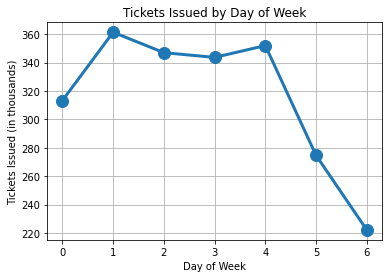

In [ ]:
x = weekday_data["WeekDay"]
y = weekday_data["infraction_description"]/1000
plt.plot(x,y,marker='o',linestyle='solid',linewidth=3, markersize=12)
plt.grid()
plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("Day of Week")
plt.title("Tickets Issued by Day of Week")
import calendar
Day_Name= {'Monday': 0,'Tuesday': 1,'Wednesday': 2,'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
print(f'Index of X_lable{Day_Name}')
print('Analysis Conclusion:\nMonday had the largest impact. \nIt reached the 2nd highest impact on Thursday. \nThe lowest point was on Saturday')

# 3.1.5b Impact of month of year in all infractions


In [ ]:
month_data = df.groupby(["Month"],as_index=False).agg({"infraction_description":'count',})
month_data = month_data.sort_values(by=["Month"])
month_data

,Month,infraction_description
0,1,160463
1,2,140191
2,3,193198
3,4,188258
4,5,193634
5,6,186244
6,7,196548
7,8,190099
8,9,198012
9,10,202567


Analysis Conclusion:
October had the largest impact. 
It reached the 2nd highest impact on July. 
The lowest point was on Feburary


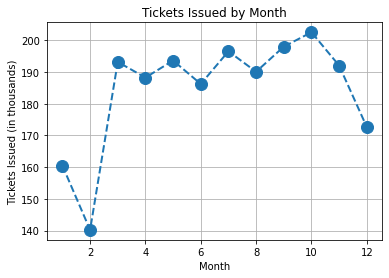

In [ ]:
x = month_data["Month"]
y = month_data["infraction_description"]/1000
plt.plot(x,y,marker='o',linestyle='dashed',linewidth=2, markersize=12)
plt.grid()
plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("Month")
plt.title("Tickets Issued by Month")
print('Analysis Conclusion:\nOctober had the largest impact. \nIt reached the 2nd highest impact on July. \nThe lowest point was on Feburary')


# 3.1.5c Impact of season of year in all infractions


In [ ]:
season_data = month_data.groupby(["Month"],as_index=False).agg({"infraction_description":'count',})
season_data = month_data.sort_values(by=["Month"])
season_data



,Month,infraction_description
0,1,160463
1,2,140191
2,3,193198
3,4,188258
4,5,193634
5,6,186244
6,7,196548
7,8,190099
8,9,198012
9,10,202567


In [ ]:

season_data['Season'] = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn','Autumn','Winter',]
season_data
season_data = season_data.groupby(["Season"],as_index=False).sum({"infraction_description":'sum',})
season_data


,Season,Month,infraction_description
0,Autumn,30,592633
1,Spring,12,575090
2,Summer,21,572891
3,Winter,15,473325


Analysis Conclusion: 
Autumn had the largest impact. 
It reached the 2nd highest impact on Spring. 
The lowest point was on Winter


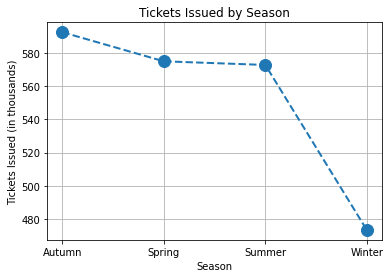

In [ ]:
x = season_data["Season"]
y = season_data["infraction_description"]/1000
plt.plot(x,y,marker='o',linestyle='dashed',linewidth=2, markersize=12)
plt.grid()
plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("Season")
plt.title("Tickets Issued by Season")

print('Analysis Conclusion: \nAutumn had the largest impact. \nIt reached the 2nd highest impact on Spring. \nThe lowest point was on Winter')

# 3.3.1ai Distribution of infractions by year

In [ ]:
def get_year_file(path=''):
  path = path 
  all_files = glob.glob(path + "/*.csv")
  li=[]

  for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Create a dataframe using the imported data
  parking_data = pd.concat(li, axis=0, ignore_index=True)

  return parking_data

unzip 2016-2020 file from Google Drive

In [ ]:
!unzip '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/parking_tags_data_2020.zip' -d '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2020'

Archive:  /content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/parking_tags_data_2020.zip
replace /content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2020/Parking_Tags_Data_2020.000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2020/Parking_Tags_Data_2020.001.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2020/Parking_Tags_Data_2020.002.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2020/Parking_Tags_Data_2020.003.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: b
error:  invalid response [b]
replace /content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2020/Parking_Tags_Data_2020.003.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2020/Parking_Tags_Data_2020.004.csv? [y]es, 

In [ ]:
!unzip '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/parking_tags_data_2019.zip' -d '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2019'

In [ ]:
!unzip '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/parking-tickets-2018.zip' -d '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2018'

In [ ]:
!unzip '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/parking-tickets-2017.zip' -d '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2017'

In [ ]:
!unzip '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/parking-tickets-2016.zip' -d '/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2016'

In [ ]:
parking_infraction_2020 = get_year_file('/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2020')

In [ ]:
parking_infraction_2019 = get_year_file('/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2019')

In [ ]:
parking_infraction_2018 = get_year_file('/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2018')

In [ ]:
parking_infraction_2017 = get_year_file('/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2017')

In [ ]:
parking_infraction_2016 = get_year_file('/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/data_2016')

In [ ]:
parking_infraction_2016.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***03850,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,NaN,NaN,ON
1,***03851,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
2,***98221,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,274 GEORGE ST,NaN,NaN,ON
3,***85499,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,270 GEORGE ST,NaN,NaN,ON
4,***03852,20160101,406.0,PARK-VEH. W/O VALID ONT PLATE,40,2.0,NR,45 GLOUCESTER ST,NaN,NaN,ON


Data preprocessing
year month

In [ ]:
def add_year_month(parking_data=''):

  parking_data['date'] = pd.to_datetime(parking_data['date_of_infraction'],format='%Y%m%d')
  #parking_data.index = parking_data['date_of_infraction']
  #del parking_data['date_of_infraction']
  parking_data['Year'] = pd.DatetimeIndex(parking_data['date']).year
  parking_data['Month'] = pd.DatetimeIndex(parking_data['date']).month
  return filename


In [ ]:
add_year_month(parking_infraction_2016)

'/content/gdrive/MyDrive/TorontoParkingTickets/ParkingTickets/Parking_Tags_Data_2019.008.csv'

In [ ]:
parking_infraction_2016.head(5)


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,date,Year,Month
0,***14036,20160429,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1145.0,NR,443 UNIVERSITY AVE,NaN,NaN,ON,2016-04-29,2016,4
1,***36810,20160429,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1145.0,OPP,95 WELLINGTON ST W,NaN,NaN,ON,2016-04-29,2016,4
2,***26310,20160429,3.0,PARK ON PRIVATE PROPERTY,30,1146.0,NaN,130 VAUGHAN RD,NaN,NaN,ON,2016-04-29,2016,4
3,***27491,20160429,307.0,PARK VEHICLE OUTSIDE OF SPACE,30,1146.0,NaN,1010 YONGE ST,NaN,NaN,ON,2016-04-29,2016,4
4,***02237,20160429,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,1146.0,OPP,190 ELIZABETH ST,NaN,NaN,ON,2016-04-29,2016,4


In [ ]:
add_year_month(parking_infraction_2017)

add_year_month(parking_infraction_2018)
add_year_month(parking_infraction_2019)
add_year_month(parking_infraction_2020)
#put all 5 year file into one file
five_year_data = pd.concat([parking_infraction_2016,parking_infraction_2017,parking_infraction_2018,parking_infraction_2019,parking_infraction_2020])

In [ ]:
len(five_year_data)
five_year_data.head(5)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,date,Year,Month
0,***14036,20160429,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1145.0,NR,443 UNIVERSITY AVE,NaN,NaN,ON,2016-04-29,2016,4
1,***36810,20160429,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1145.0,OPP,95 WELLINGTON ST W,NaN,NaN,ON,2016-04-29,2016,4
2,***26310,20160429,3.0,PARK ON PRIVATE PROPERTY,30,1146.0,NaN,130 VAUGHAN RD,NaN,NaN,ON,2016-04-29,2016,4
3,***27491,20160429,307.0,PARK VEHICLE OUTSIDE OF SPACE,30,1146.0,NaN,1010 YONGE ST,NaN,NaN,ON,2016-04-29,2016,4
4,***02237,20160429,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,1146.0,OPP,190 ELIZABETH ST,NaN,NaN,ON,2016-04-29,2016,4


In [ ]:
year_data = five_year_data.groupby(["Year"],as_index=False).agg({"infraction_description":'count',})
#year_data = year_data.sort_values(by=["infraction_code"])
year_data.head(10)

,Year,infraction_description
0,2016,2254761
1,2017,2144226
2,2018,2044288
3,2019,2213939
4,2020,1403663


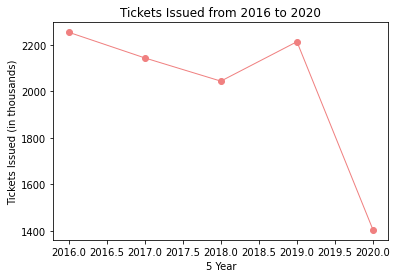

In [ ]:
x=year_data['Year']
y=year_data["infraction_description"]/1000
plt.plot(x,y,color="lightcoral",linewidth=1, marker="o")

plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("5 Year")
plt.title("Tickets Issued from 2016 to 2020")
plt.show()

# 3.3.1a.ii Distribution of infraction by month

In [ ]:
month_data = five_year_data.groupby(["Month"],as_index=False).agg({"infraction_description":'count',})

NameError: ignored

In [ ]:
month_data.head(5)

,Month,infraction_description
0,1,884235
1,2,798982
2,3,888157
3,4,759052
4,5,795061


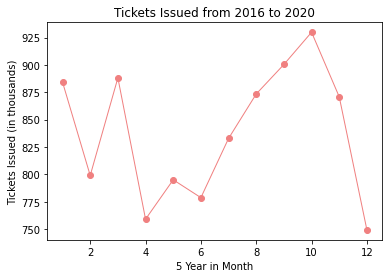

In [ ]:
x=month_data['Month']
y=month_data["infraction_description"]/1000
plt.plot(x,y,color="lightcoral",linewidth=1, marker="o")

plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("5 Year in Month")
plt.title("Tickets Issued from 2016 to 2020")

plt.show()

# 3.3.1b Distribution of top 20 infraction by fine

In [ ]:
Top20_infraction_data = five_year_data.groupby(["set_fine_amount"],as_index=False).agg({"infraction_description":'count',})

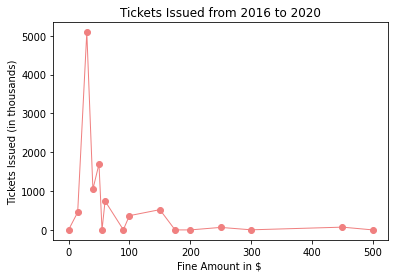

In [ ]:
x=Top20_infraction_data['set_fine_amount']
y=Top20_infraction_data["infraction_description"]/1000
plt.plot(x,y,color="lightcoral",linewidth=1, marker="o")

plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("Fine Amount in $ ")
plt.title("Tickets Issued from 2016 to 2020")

plt.show()

In [ ]:
Top20_infraction_data.head(20)

,set_fine_amount,infraction_description
0,0,811
1,15,453482
2,30,5088606
3,40,1046365
4,50,1696483
5,55,257
6,60,743885
7,90,4126
8,100,367058
9,150,521289


# 3.3.2a Geographic Distribution of top20 infraction

In [ ]:
Top20_infraction_data_geo_distribution = five_year_data.groupby(["location2"],as_index=False).agg({"infraction_description":'count',})

In [ ]:
Top20_infraction_data

,set_fine_amount,infraction_description
0,0,811
1,15,453482
2,30,5088606
3,40,1046365
4,50,1696483
5,55,257
6,60,743885
7,90,4126
8,100,367058
9,150,521289


In [ ]:
#Top20_infraction_data_geo_distribution.nlargest()

In [ ]:

for_map = Top20_infraction_data_geo_distribution

for_map=for_map.sort_values('infraction_description', ascending=False).head(20)
parking_data_test=for_map

In [ ]:
import geopy
from geopy.geocoders import Nominatim 
from geopy.extra.rate_limiter import  RateLimiter
from time import sleep
from geopy import distance
import pandas as pd
#from ipyleaflet import Map, AntPath, MeasureControl
import ipywidgets
from vega_datasets import data as vds

nominatim_service = Nominatim(user_agent='https://colab.research.google.com/drive/1KqqNXERPSReA9wR0QbBAQYq83efMh464#scrollTo=xdxlX1SJ0L33')
geolocator = RateLimiter(nominatim_service.geocode, min_delay_seconds=1)
parking_data_test['location_new'] = parking_data_test['location2'].apply(geolocator)
parking_data_test['Latitude'] = parking_data_test['location_new'].apply(lambda loc: loc.latitude if loc else None)
parking_data_test['Longitude'] = parking_data_test['location_new'].apply(lambda loc: loc.longitude if loc else None)




In [ ]:
for_map=parking_data_test

In [ ]:
for_map.head(5)

,location2,infraction_description,location_new,Latitude,Longitude
137126,2075 BAYVIEW AVE,23368,"(Bayview Avenue, Shorehaven, Manhasset, North ...",40.797789,-73.705095
129608,20 EDWARD ST,19343,"(20, Edward Street, Stapleford, City of Nottin...",52.930695,-1.277255
50420,1265 MILITARY TRL,14861,"(Military Trail, Jupiter, Palm Beach County, F...",26.914276,-80.102518
76891,15 MARINE PARADE DR,14626,"(15, Marine Parade Drive, Etobicoke—Lakeshore,...",43.629106,-79.475411
1400,1 BRIMLEY RD S,13649,"(1, Brimley Road South, Scarborough Southwest,...",43.705962,-79.235491


In [ ]:
import sys
'geopandas' in sys.modules

True

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 4.0MB/s 
     |████████████████████████████████| 14.8MB 318kB/s 
     |████████████████████████████████| 6.5MB 29.1MB/s 


In [ ]:
import geopandas as gpd
import folium

congr_districts = gpd.read_file('/content/gdrive/MyDrive/TorontoParkingTickets/Toronto_City_Ward/WARD_WGS84.shp')
congr_districts
# Set datum and projection info for census.gov 2015 Tiger data
congr_districts.crs = {'datum': 'NAD83', 'ellps': 'GRS80', 'proj':'longlat', 'no_defs':True}

# Filter out all but the district of interest
#district23 = congr_districts[ 'AREA_S_CD' == 16 ]  

In [ ]:
distric_map = folium.Map(location=[42.5, -76], zoom_start=7, tiles='cartodbpositron' )
#folium.GeoJson(congr_districts).add_to(distric_map)
distric_map

In [ ]:
congr_districts

,AREA_ID,AREA_TYPE,AREA_S_CD,AREA_L_CD,AREA_NAME,X,Y,LONGITUDE,LATITUDE,geometry
0,2551040,WD18,16,16,Don Valley East,318237.290,4844000.0,-79.33298,43.739716,"POLYGON ((-79.31335 43.71699, -79.31950 43.715..."
1,2551044,WD18,03,03,Etobicoke-Lakeshore,303099.474,4831000.0,-79.52087,43.621646,"POLYGON ((-79.49777 43.65198, -79.49725 43.651..."
2,2551048,WD18,15,15,Don Valley West,314825.876,4843000.0,-79.37536,43.728396,"POLYGON ((-79.35232 43.71573, -79.35209 43.715..."
3,2551052,WD18,23,23,Scarborough North,324522.149,4852000.0,-79.25467,43.809672,"POLYGON ((-79.22591 43.83960, -79.22556 43.839..."
4,2551056,WD18,11,11,University-Rosedale,313306.543,4837000.0,-79.39432,43.671139,"POLYGON ((-79.39004 43.69050, -79.39004 43.690..."
5,2551035,WD18,10,10,Spadina-Fort York,313874.844,4833000.0,-79.38733,43.635801,"POLYGON ((-79.38377 43.65572, -79.38320 43.654..."
6,2551039,WD18,09,09,Davenport,309296.325,4836000.0,-79.44405,43.669353,"POLYGON ((-79.44642 43.68625, -79.44612 43.685..."
7,2551037,WD18,05,05,York South-Weston,305318.582,4839000.0,-79.49337,43.694951,"POLYGON ((-79.46935 43.70868, -79.46888 43.706..."
8,2551041,WD18,17,17,Don Valley North,316048.951,4850000.0,-79.36004,43.787602,"POLYGON ((-79.38349 43.76408, -79.38715 43.763..."
9,2551042,WD18,08,08,Eglinton-Lawrence,310114.447,4842000.0,-79.43385,43.718315,"POLYGON ((-79.46457 43.69217, -79.46462 43.692..."


In [ ]:
import folium
from folium.plugins import HeatMap

max_amount = float(Top20_infraction_data['infraction_description'].max())

hmap = folium.Map(location=[41.0, -75.5], zoom_start=7, )
data = [[row[1], row[2]] for row  in for_map]
hm_wide = HeatMap( list(zip(for_map["Latitude"],for_map["Longitude"])), 
                   min_opacity=0.5,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

#folium.GeoJson(congr_districts).add_to(hmap)
hmap.add_child(hm_wide)

# 3.3.2.b Geographic Distribution by ward

In [ ]:
import folium
from folium.plugins import HeatMap

max_amount = float(Top20_infraction_data['infraction_description'].max())

hmap = folium.Map(location=[41.0, -75.5], zoom_start=7, )
data = [[row[1], row[2]] for row  in for_map]
hm_wide = HeatMap( list(zip(for_map["Latitude"],for_map["Longitude"])), 
                   min_opacity=0.5,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(congr_districts).add_to(hmap)
hmap.add_child(hm_wide)